## Import Libraries¶

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# All relevant libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.saving import save_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

## Loading Files

In [3]:
#train = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")
#train.head()


In [4]:
train = pd.read_csv('train.csv', dtype={'Column26': str})
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
test = pd.read_csv('test.csv', dtype={'Column26': str})
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,2022.000,Good,809.98,35.030,22 Years and 9 Months,No,49.575,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.053,22 Years and 10 Months,No,49.575,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.812,NaN,No,49.575,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.000,Good,809.98,32.431,23 Years and 0 Months,No,49.575,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.987,2,...,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [6]:
print(train.shape)
print(test.shape)

(100000, 28)
(50000, 27)


# Exploratory Data Analysis and Visualization

In [7]:
df = train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
df.shape


(100000, 28)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000,4194.171,3183.686,303.645,1625.568,3093.745,5957.448,15204.633
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
Credit_Utilization_Ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
Total_EMI_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000


In [11]:
df.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


## Features and Data Cleaning

In [12]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [13]:
df.isna().sum()[df.isna().sum() > 0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


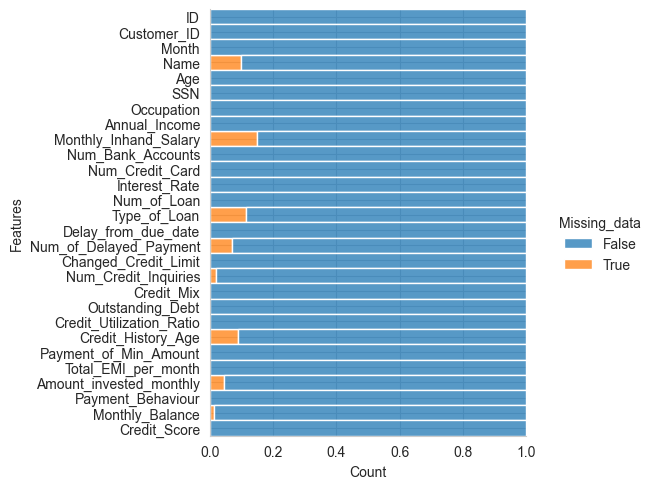

In [14]:
def na_ratio_plot(df=df):

    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features')\
                ,y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

print(df.isna().sum()[df.isna().sum()>0])
na_ratio_plot()

### Data Cleaning


#### Month

In [15]:
df.Month.value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [16]:
df.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [17]:
dict = {"January" : 1,"February" : 2,"March" : 3,"April" : 4,"May" : 5,"June" : 6,"July" : 7,"August" : 8}
df["Month"] = df["Month"].map(dict)

#### Age

In [18]:


# 'Age' 
def clean_age(age):
    try:
        return int(age)
    except ValueError:
        return None

df['Age'] = df['Age'].str.replace('_', '').str.replace('-', '')
df['Age'] = df['Age'].apply(clean_age)


In [19]:

def truncate_last_two_digits(age):
    if age > 99:
        return age // 100
    else:
        return age


df['Age'] = df['Age'].apply(truncate_last_two_digits)


df.Age

0        23
1        23
2         5
3        23
4        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 100000, dtype: int64

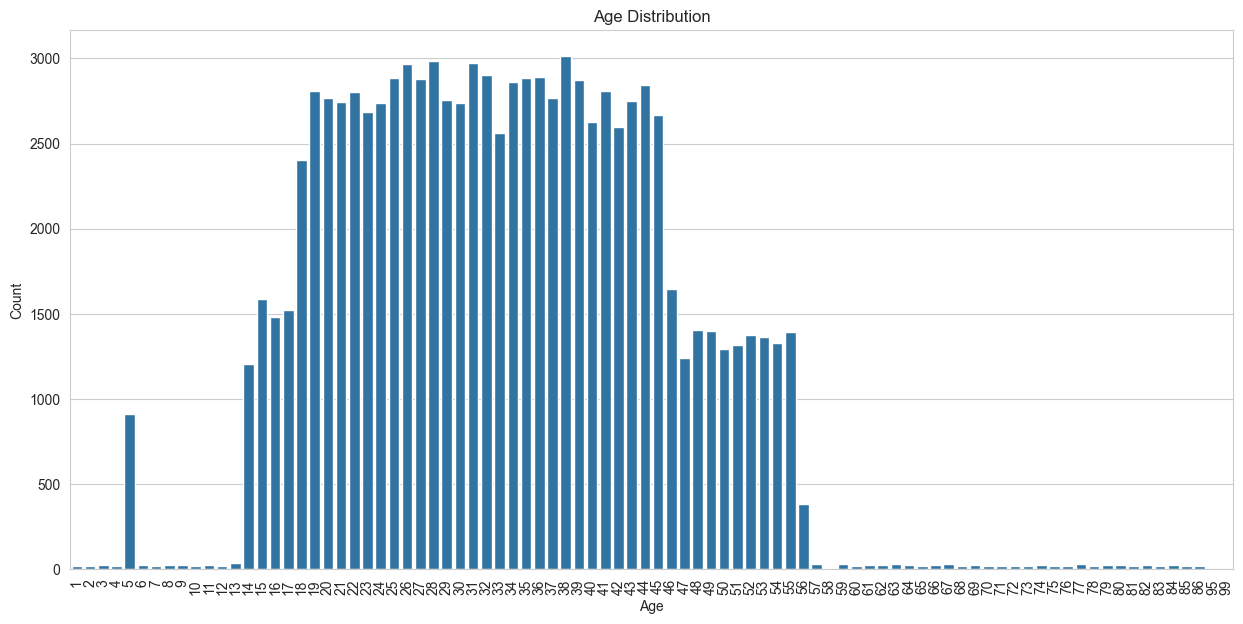

In [20]:
plt.figure(figsize=(15, 7))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

Text(0.5, 1.0, 'Customer Age Distribution')

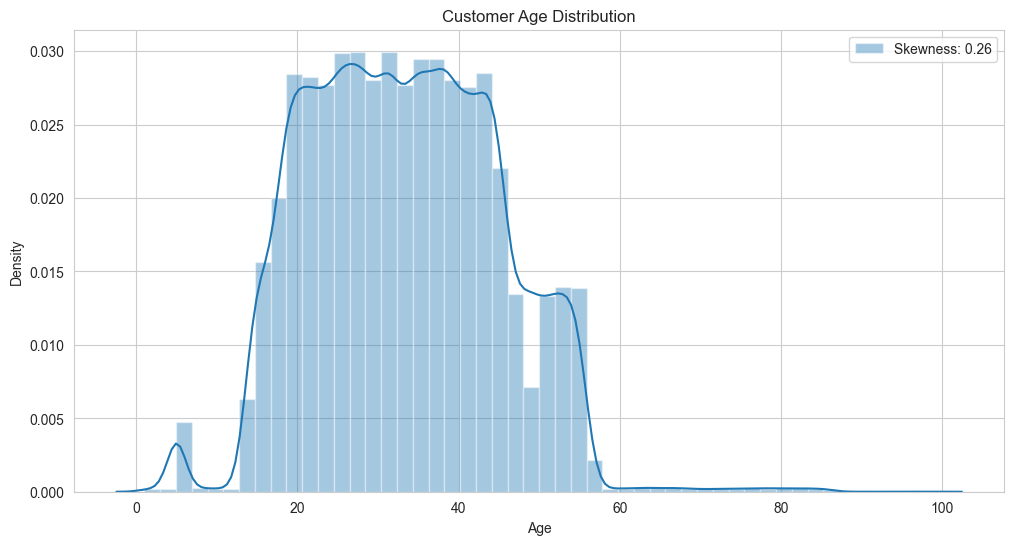

In [21]:
sns.distplot(df['Age'], label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')


#### Annual_Incame

In [22]:
# To remove the tire at the end
def remove_trailing_dash(value):
    if isinstance(value, str) and value.endswith('_'):
        return value[:-1]  # Son karakteri (tireyi) kaldır
    else:
        return value


df['Annual_Income'] = df['Annual_Income'].apply(remove_trailing_dash)

In [23]:
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [24]:
df['Annual_Income'].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

<Axes: xlabel='Annual_Income'>

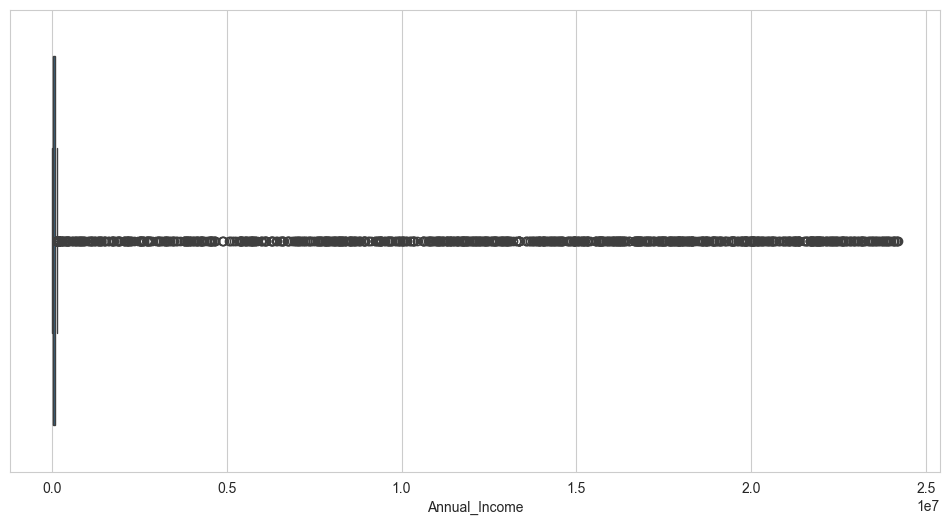

In [25]:
sns.boxplot(x = 'Annual_Income', data = df)


#### Monthly_Inhand_Salary

In [26]:
Customer_Mode_Salary = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x : x.mode().iloc[0])
df['Monthly_Inhand_Salary'] = np.where(df['Monthly_Inhand_Salary'].isnull(), Customer_Mode_Salary, df['Monthly_Inhand_Salary'])

Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

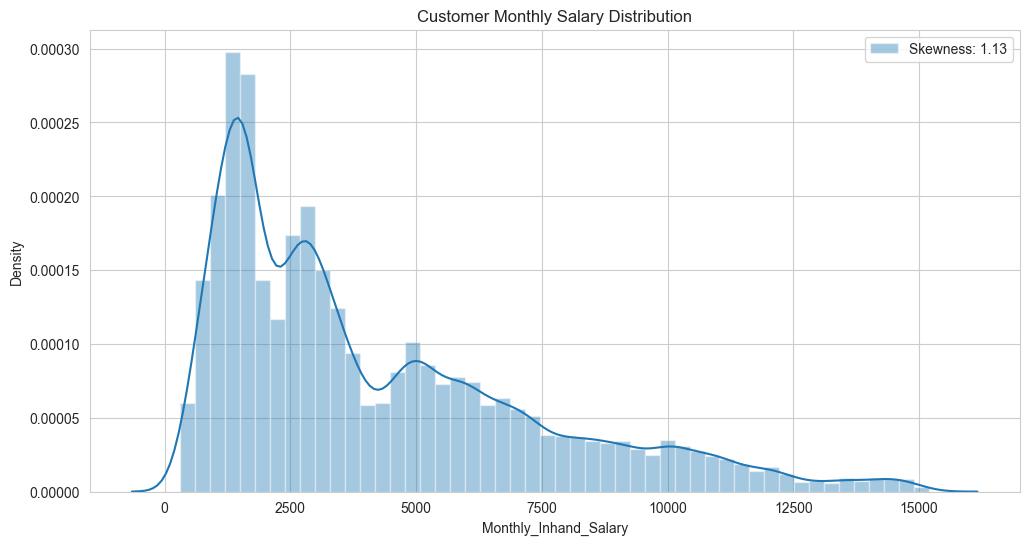

In [27]:
sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

#### Occupation'

In [28]:
def fill_occupation_by_ssn(df):
    # Replace '_______' values ​​in 'Occupation' column with NaN (empty) values
    df['Occupation'] = df['Occupation'].replace('_______', np.nan)
    
    # Find the most recurring 'Occupation' values ​​for each SNN number
    most_common_occupation_by_ssn = df.groupby('SSN')['Occupation'].apply(lambda x: x.mode().iloc[0])
    
    # 'Populating '_______' values ​​in 'Occupation' column
    for index, row in df.iterrows():
        if pd.isnull(row['Occupation']) and row['SSN'] in most_common_occupation_by_ssn:
            df.at[index, 'Occupation'] = most_common_occupation_by_ssn[row['SSN']]


fill_occupation_by_ssn(df)

In [29]:
occupation_count = df['Occupation'].value_counts()
occupation_count

Occupation
Lawyer           7489
Engineer         6837
Architect        6806
Mechanic         6752
Accountant       6717
Scientist        6713
Media_Manager    6689
Developer        6687
Teacher          6646
Entrepreneur     6621
Doctor           6537
Journalist       6502
Manager          6402
Musician         6322
Writer           6280
Name: count, dtype: int64

Text(0.5, 0, 'Occupation')

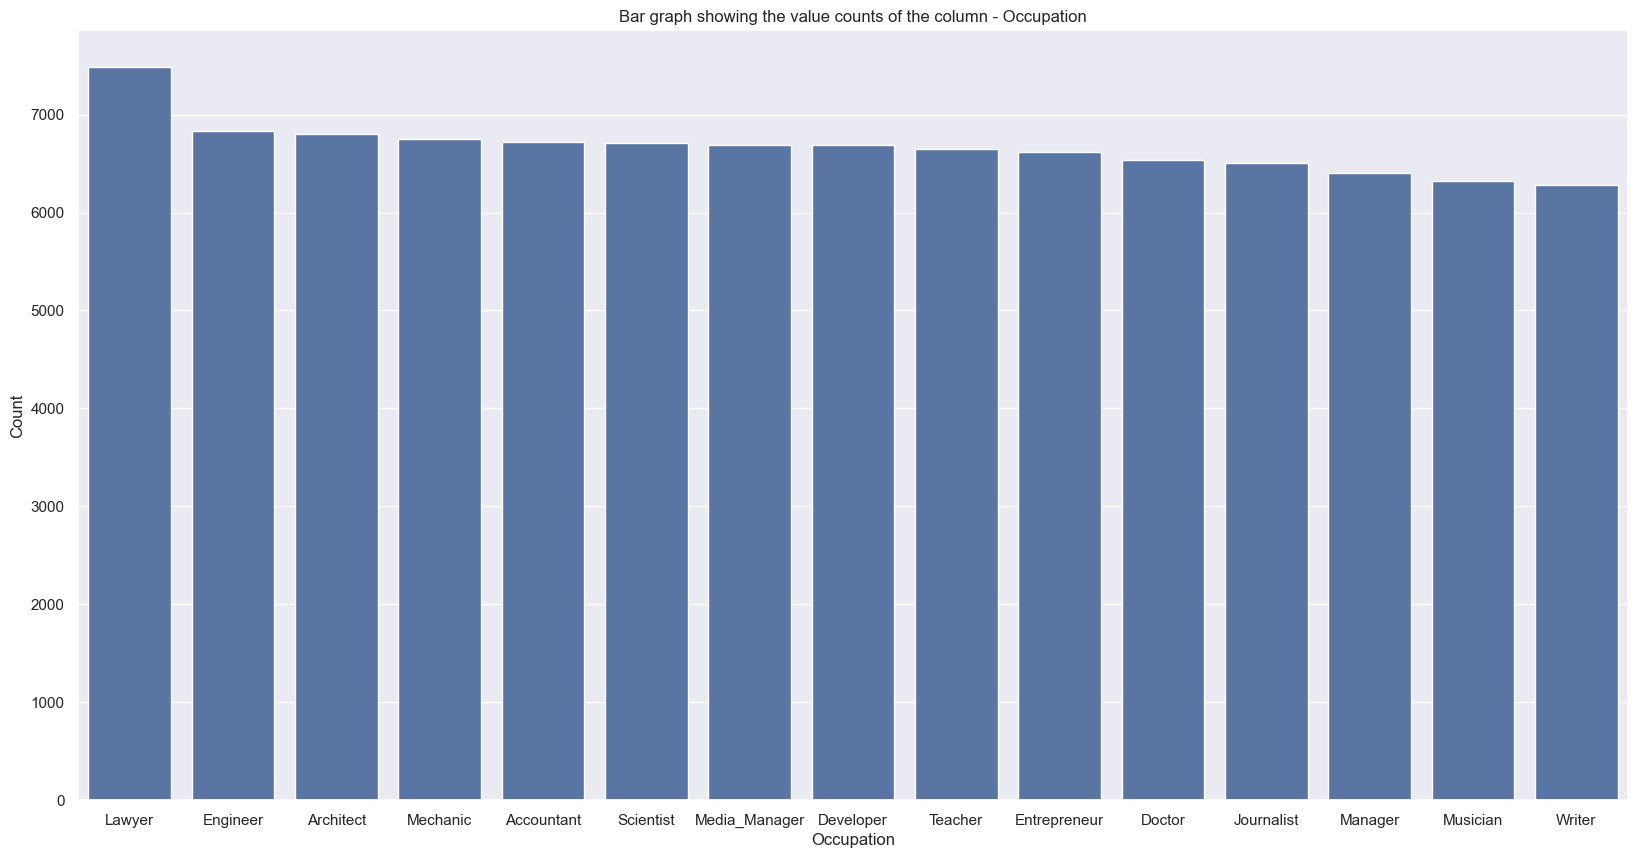

In [30]:
# occupation_count, chart with the number of occupations in the Occupation column
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Occupation', fontsize=12)

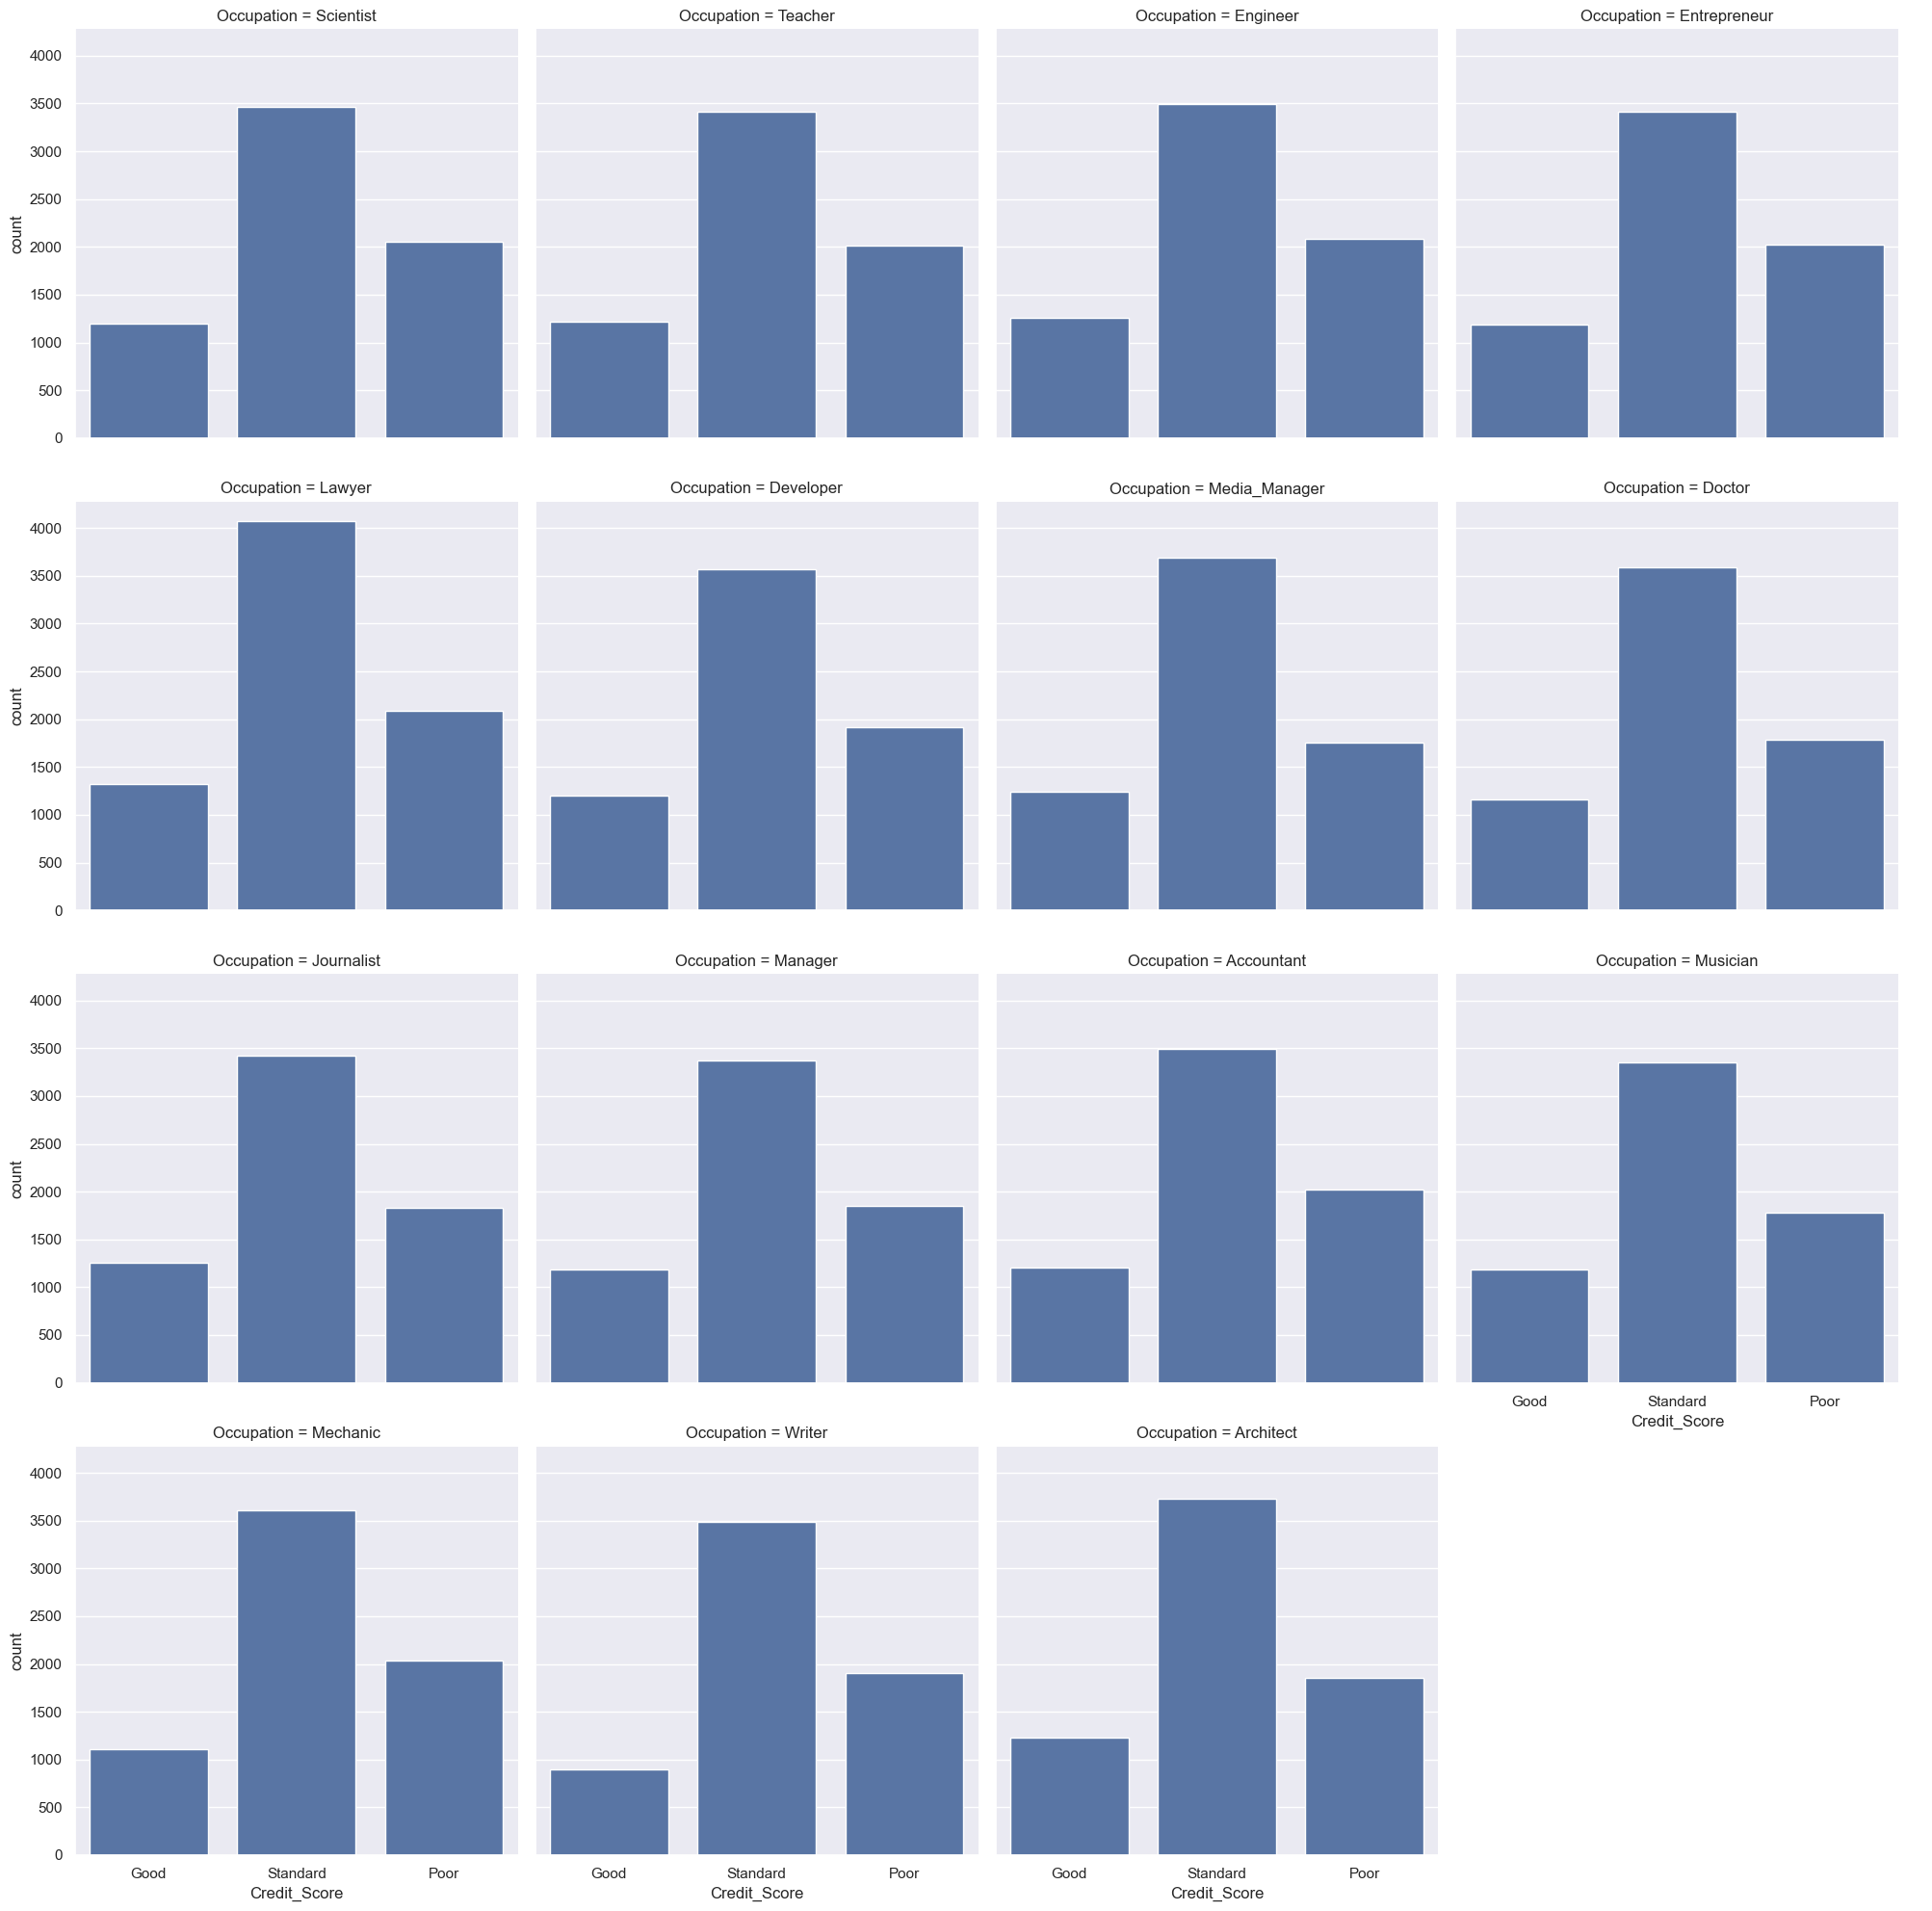

In [31]:
sns.catplot(x='Credit_Score', col='Occupation', data=df, kind='count', col_wrap=4)

#### Num_of_Loan

In [32]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [33]:
# Function to remove "-" and "_" characters
def clean_num(num):
    num = num.strip("-_")  
    if num == "100":  
        return np.nan
    elif len(num) > 1:  
        return num[0]
    else:
        return num


df["Num_of_Loan"] = df["Num_of_Loan"].apply(clean_num)


most_common_value = df["Num_of_Loan"].mode()[0]
df["Num_of_Loan"] = df["Num_of_Loan"].fillna(most_common_value)

In [34]:
df.Num_of_Loan.value_counts()

Num_of_Loan
3    19016
2    15076
4    14776
0    10930
1    10800
6     7839
7     7368
5     7231
9     3736
8     3228
Name: count, dtype: int64

In [35]:
df.Num_of_Loan.isnull().sum()

0

#### Type_of_Loan

In [36]:

df['Type_of_Loan'].fillna('Unknown', inplace=True)


In [37]:
loan_type_groups = df.groupby('Type_of_Loan').size()
print(loan_type_groups)

Type_of_Loan
Auto Loan                                                                                                                                    1152
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan                          8
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan                                                                      8
Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan        8
Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan                                                8
                                                                                                                                            ...  
Student Loan, and Not Specified                                                                                

In [38]:
df.Type_of_Loan.value_counts()

Type_of_Loan
Unknown                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

#### Num_of_Delayed_Payment

In [39]:

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna('0')

In [40]:
def remove_special_characters(value):
    if isinstance(value, str):
       
        value = value.strip('_').strip('-')
    return value



In [41]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(
    remove_special_characters)

#### Changed_Credit_Limit

In [42]:

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('-', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)


df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')


mean_value = df['Changed_Credit_Limit'].mean()


df['Changed_Credit_Limit'].fillna(mean_value, inplace=True)

#### Num_Credit_Inquiries

In [43]:
df['Num_Credit_Inquiries'].unique()

array([   4.,    2.,    3., ..., 1361.,  310.,   74.])

In [44]:

df['Num_Credit_Inquiries'].fillna(0, inplace=True)

#### Credit_Mix

In [45]:
credit_mix_count = df['Credit_Mix'].value_counts()
credit_mix_count

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [46]:

df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

def fill_na_cat(data, val):
  
    for col in data.select_dtypes(include='object').columns:
        mode_by_customer = data.groupby('Customer_ID')[col].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        mode_global = data[col].mode()[0]
        data[col] = data[col].fillna(mode_by_customer.fillna(mode_global))
    return data

df = fill_na_cat(data=df, val="Credit_Mix")



In [47]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

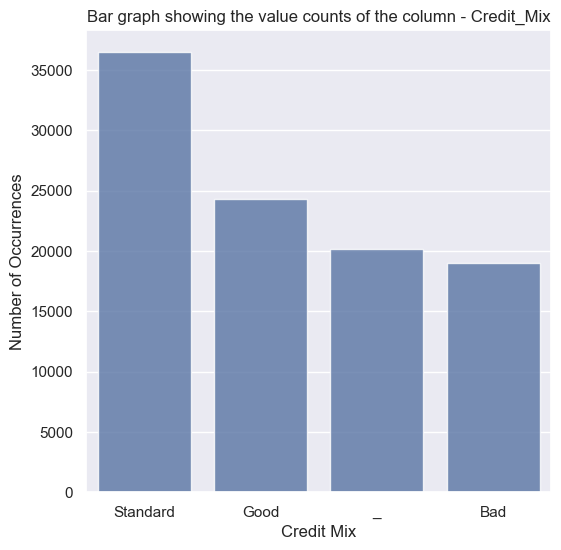

In [48]:
# Bar graph showing the value counts of the column - Credit_Mix

sns.set(rc={'figure.figsize': (6, 6)})
sns.barplot(x=credit_mix_count.index, y=credit_mix_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Credit Mix', fontsize=12)
plt.show()

In [49]:
credit_mix_count = df['Credit_Mix'].value_counts()
credit_mix_count




Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [50]:
df.sample(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
84409,0x20497,CUS_0x93ba,2,Ransdell Piersonm,22,159-90-4552,Lawyer,110603.940,9463.995,5,...,Standard,805.01,37.223,19 Years and 9 Months,No,68.792,413.1059105826559,High_spent_Small_value_payments,724.5019878015025,Standard
60180,0x1769e,CUS_0x40d,5,Luke Jeffsj,43,011-33-6276,Engineer,17908.150,1748.346,4,...,Standard,755.6,36.709,9 Years and 9 Months,NM,61.590,179.84322783613752,Low_spent_Medium_value_payments,213.4015621346773,Standard
63219,0x1886d,CUS_0x513a,4,Griffithss,36,020-26-0390,Lawyer,137048.560,11539.713,3,...,Standard,439.34,34.065,25 Years and 8 Months,No,300.952,1490.9850088249993,Low_spent_Small_value_payments,476.45442029043375,Standard
7873,0x4423,CUS_0x9da6,2,Annv,34,114-37-3012,Entrepreneur,20516.180,1766.682,5,...,Standard,232.52,36.058,18 Years and 2 Months,No,56.371,36.57524943844953,High_spent_Large_value_payments,323.72220615401943,Standard
65841,0x197cb,CUS_0x2878,2,Philipd,25,812-39-0469,Journalist,26838.730,2020.561,8,...,Standard,646.98,37.241,9 Years and 3 Months,Yes,29.131,53.37749186460103,!@9#%8,369.54725650651017,Standard
6471,0x3be9,CUS_0x3644,8,Alexz,16,623-91-4031,Accountant,61719.900,4860.325,7,...,Bad,3643.78,24.669,7 Years and 0 Months,Yes,354.767,215.93960833489268,High_spent_Small_value_payments,175.32568132682823,Standard
39848,0xff7e,CUS_0x8247,1,Daye,16,597-93-5210,Scientist,9670.150,733.846,8,...,Bad,3566.81,25.279,4 Years and 3 Months,Yes,35.320,31.846561330923052,Low_spent_Small_value_payments,296.2182786092706,Poor
11870,0x5b8c,CUS_0x360c,7,Renee Maltezouj,54,376-91-9157,Architect,12241.570,1248.131,6,...,Standard,89.62,26.023,23 Years and 9 Months,No,21.641,91.29721431136214,Low_spent_Small_value_payments,301.875162309786,Standard
46622,0x1272c,CUS_0x8800,7,Kate Holtonp,35,154-71-8470,Scientist,15815.220,1241.935,6,...,Bad,2344.37,29.458,14 Years and 2 Months,NM,63.782,32.85780817614779,High_spent_Small_value_payments,287.5533495990575,Poor
34371,0xdf65,CUS_0x3f7,4,Kellya,25,966-78-9490,Entrepreneur,26104.480,1995.373,4,...,Standard,377.32,29.481,6 Years and 6 Months,Yes,87.220,125.62867445388686,Low_spent_Large_value_payments,256.68870840013875,Standard


#### Credit_History_Age

In [51]:
# Covert Credit_History_Age to month
def parse_years_and_months_to_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  


df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months_to_months)

In [52]:
df.drop(columns=['Credit_History_Age'], inplace=True)

#### Amount_invested_monthly    


In [53]:

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace(
    '__10000__', np.nan)

df['Amount_invested_monthly'] = df.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [54]:
df['Amount_invested_monthly'].isnull().sum()

0

#### Monthly_Balance

In [55]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
 __-333333333333333333333333333__    9
 239.59620527100063                  6
 212.44492522535438                  5
 128.54140433011784                  5
 244.99107777431962                  5
                                    ..
 658.9412372133265                   1
 1072.867912409617                   1
 740.0418087099729                   1
 1279.6106996658787                  1
393.674                              1
Name: count, Length: 98792, dtype: int64

In [56]:

df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)

df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]+', '').str.replace('_', '').str.replace('-', '')


In [57]:

df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

mean_value = df['Monthly_Balance'].mean()

df['Monthly_Balance'].fillna(mean_value, inplace=True)

In [58]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
333333333333333314856026112.000    9
239.596                            6
212.445                            5
128.541                            5
244.991                            5
                                  ..
658.941                            1
1072.868                           1
740.042                            1
1279.611                           1
393.674                            1
Name: count, Length: 98792, dtype: int64

#### Payment_Behaviour

In [59]:

df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)


In [60]:
df['Payment_Behaviour'].isna().sum()

7600

In [61]:

# Group data by 'Payment Behaviour' column
grouped_df = df.groupby('Payment_Behaviour').size()

print(grouped_df)

Payment_Behaviour
High_spent_Large_value_payments     13721
High_spent_Medium_value_payments    17540
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Low_spent_Medium_value_payments     13861
Low_spent_Small_value_payments      25513
dtype: int64


In [62]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(method='ffill')

In [63]:
df['Payment_Behaviour'].isna().sum()

0

In [64]:
grouped_df = df.groupby('Payment_Behaviour').size()

print(grouped_df)

Payment_Behaviour
High_spent_Large_value_payments     14863
High_spent_Medium_value_payments    19010
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments      11297
Low_spent_Medium_value_payments     14987
Low_spent_Small_value_payments      27593
dtype: int64


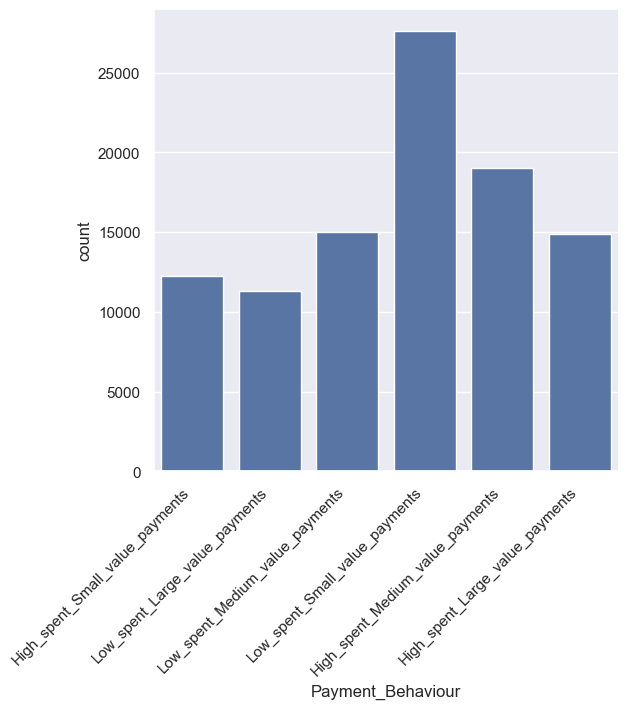

In [65]:
plot = sns.countplot(x='Payment_Behaviour', data=df)

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  

plt.show()

#### Payment_of_Min_Amount

In [66]:

min_amount_count = df['Payment_of_Min_Amount'].value_counts()
min_amount_count

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

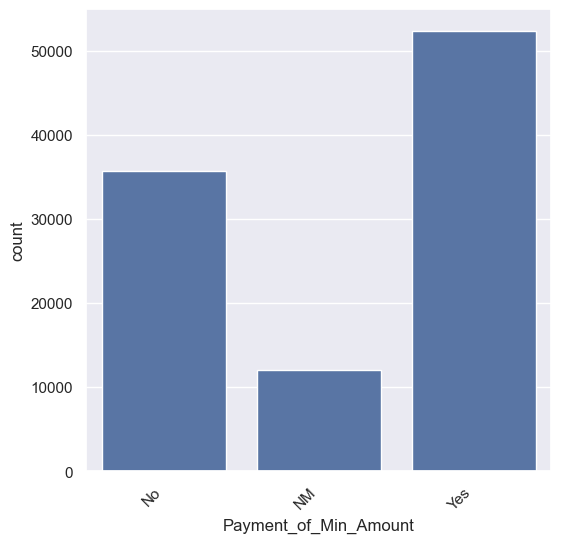

In [67]:
plot = sns.countplot(x='Payment_of_Min_Amount', data=df)

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  # ha='right' ile etiketlerin hizalanması sağlanır

plt.show()

#### Interest_Rate¶

In [68]:
df['Interest_Rate'] = df['Interest_Rate'].astype(float)


In [69]:
df.Interest_Rate.value_counts()

Interest_Rate
8.000       5012
5.000       4979
6.000       4721
12.000      4540
10.000      4540
            ... 
4995.000       1
1899.000       1
2120.000       1
5762.000       1
5729.000       1
Name: count, Length: 1750, dtype: int64

### Drop unnecessary columns

In [70]:
df.drop(['ID','Customer_ID', 'Month', 'Name','SSN', 'Type_of_Loan'], axis = 1, inplace = True)

 ### Convert numeric columns dtypes

Series([], dtype: int64)


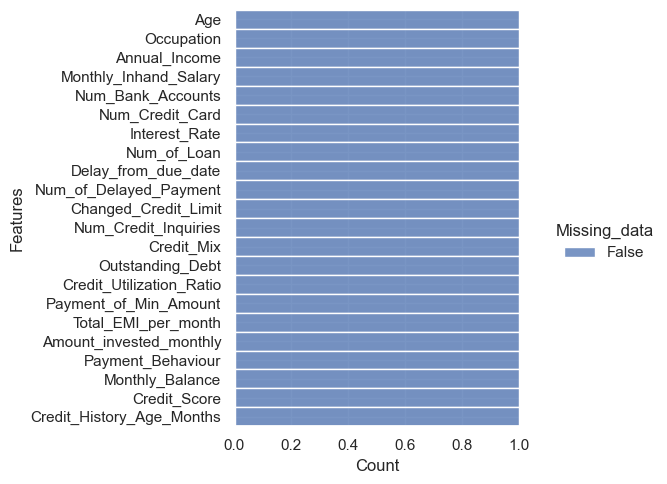

In [71]:
print(df.isna().sum()[df.isna().sum()>0])
na_ratio_plot()

In [72]:
df.dtypes 

Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                   object
Delay_from_due_date            int64
Num_of_Delayed_Payment        object
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly       object
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Months      int64
dtype: object

In [73]:
columns_to_convert = ['Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly','Num_of_Loan']
for col in columns_to_convert:
    df[col] = df[col].str.replace('_', '').astype(float)

In [74]:
df.dtypes

Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                  float64
Delay_from_due_date            int64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Months      int64
dtype: object

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.000,33.259,11.563,1.000,24.000,33.000,42.000,99.000
Annual_Income,100000.000,176415.701,1429618.051,7005.930,19457.500,37578.610,72790.920,24198062.000
Monthly_Inhand_Salary,100000.000,4198.351,3187.402,303.645,1626.762,3095.978,5961.637,15204.633
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Num_of_Loan,100000.000,3.513,2.403,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_of_Delayed_Payment,100000.000,28.779,218.115,0.000,8.000,13.000,18.000,4397.000
Changed_Credit_Limit,100000.000,10.389,6.718,-6.490,5.420,9.560,14.660,36.970


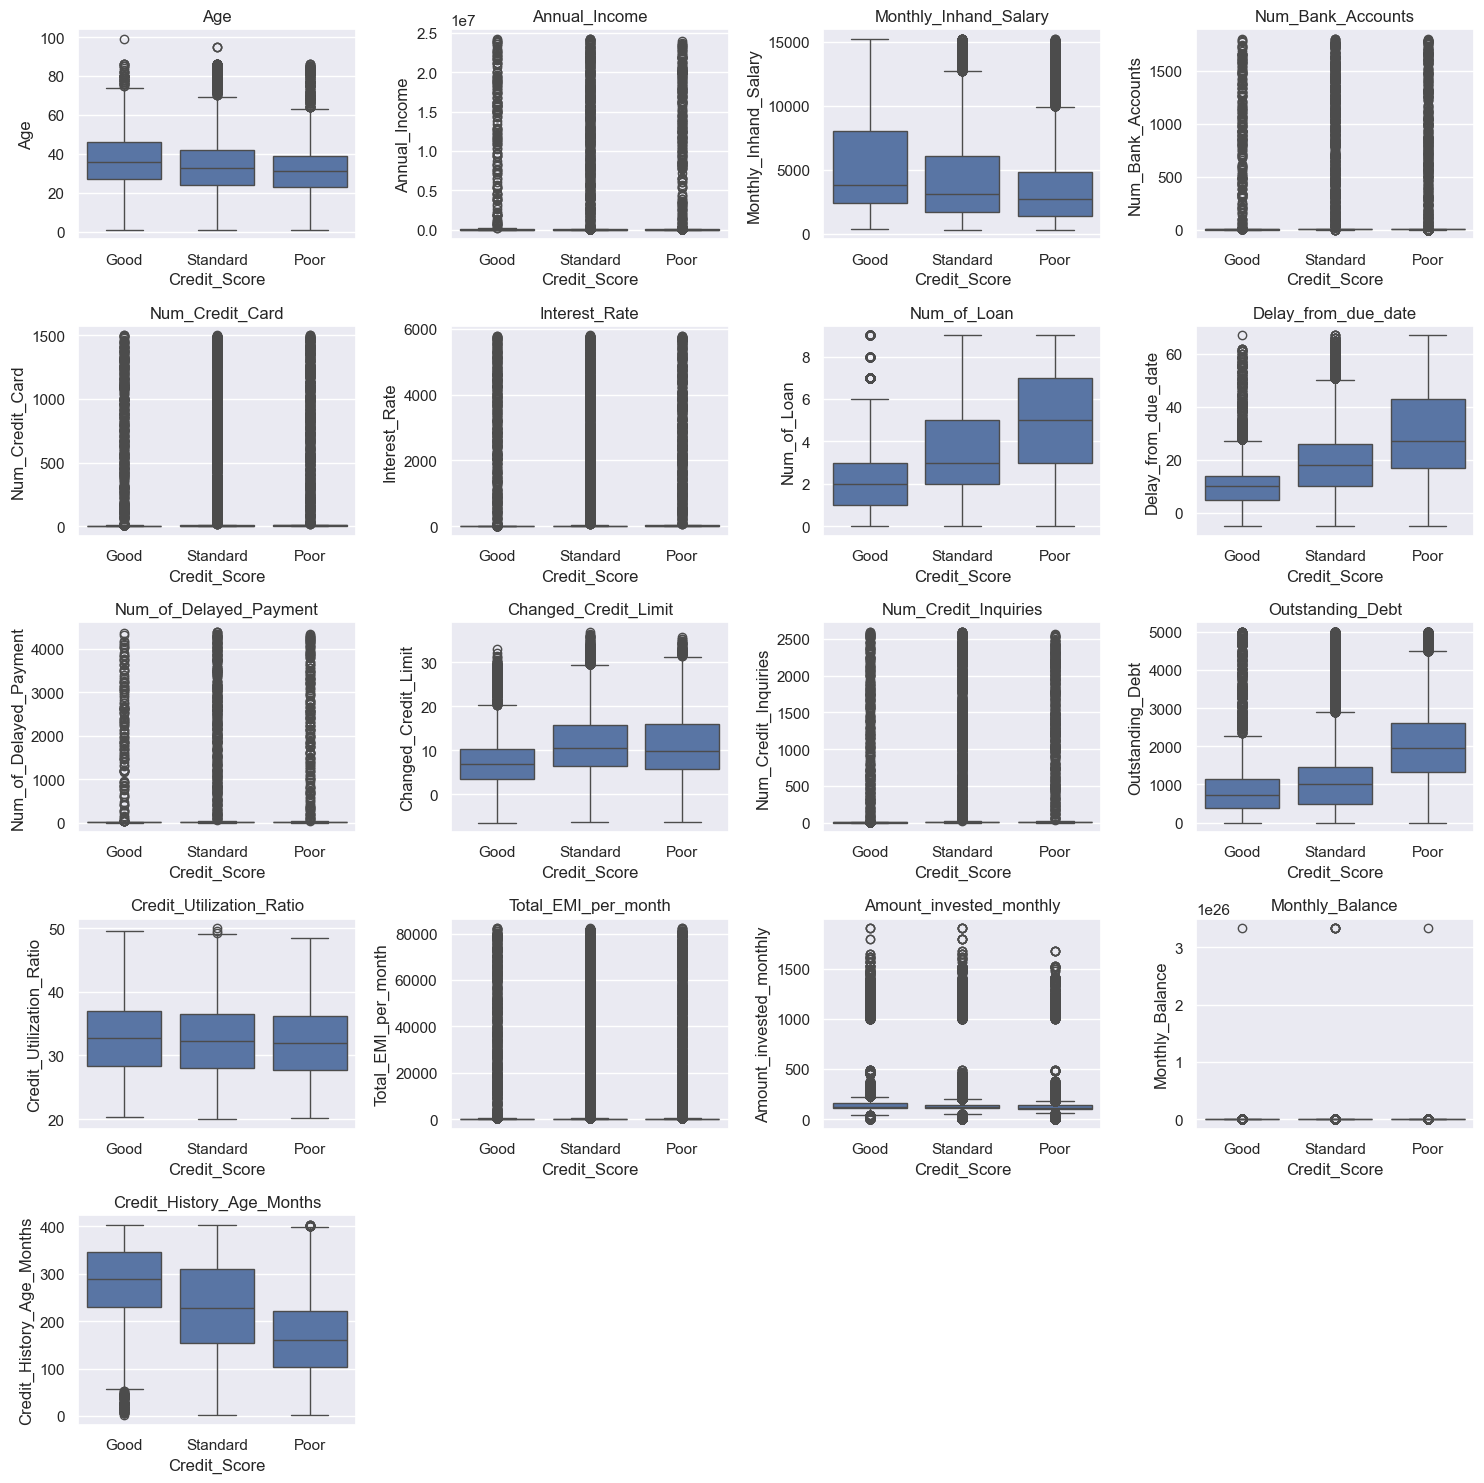

In [76]:

df_numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

plt.figure(figsize=(15,15))
for i, col in enumerate(df_numeric_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='Credit_Score', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

## Outliers

In [77]:
# outlier deletion
df_num = df.select_dtypes(include='number')
for column in df_num.columns:
    for i in df["Credit_Score"].unique():
        selected_i = df[df["Credit_Score"] == i]
        selected_column = selected_i[column]
        
        std = selected_column.std()
        mean= selected_column.mean()
        
        max = mean + (4 * std)
        min =  mean - (4 * std)
        
        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        df.drop(index=outliers, inplace=True)
        print(column, i, outliers)

Age Good Index([6005, 10438, 23704, 28718, 31217, 34967, 61535, 84261], dtype='int64')
Age Standard Index([ 1654,  5055,  8549,  8788, 10431, 11190, 13372, 14671, 15641, 17916,
       18578, 21195, 21800, 23121, 24634, 25095, 29174, 33864, 34517, 35557,
       36575, 37904, 38248, 40478, 40483, 43149, 45669, 45931, 46755, 48897,
       50233, 52065, 53434, 55609, 56864, 57307, 57513, 59143, 60190, 60625,
       61040, 61509, 63018, 63815, 63983, 64001, 64179, 64436, 65223, 65420,
       66068, 66153, 67401, 67579, 68122, 68166, 68946, 71215, 71542, 71732,
       72205, 72375, 74040, 75531, 77053, 78564, 81562, 81593, 82335, 84621,
       85741, 86769, 87236, 87755, 89933, 94475, 94945, 95620, 96689, 99512,
       99776],
      dtype='int64')
Age Poor Index([   56,  2102,  2902,  4520,  4777,  6532,  6684,  8726,  9532,  9707,
       10247, 10858, 11527, 12940, 14747, 17467, 17547, 18362, 18585, 19783,
       21069, 21498, 21502, 22277, 22612, 24730, 25769, 26550, 30084, 31459,
       3

In [78]:
df.shape

(88949, 22)

In [79]:
df.Credit_Score.value_counts()

Credit_Score
Standard    46822
Poor        26077
Good        16050
Name: count, dtype: int64

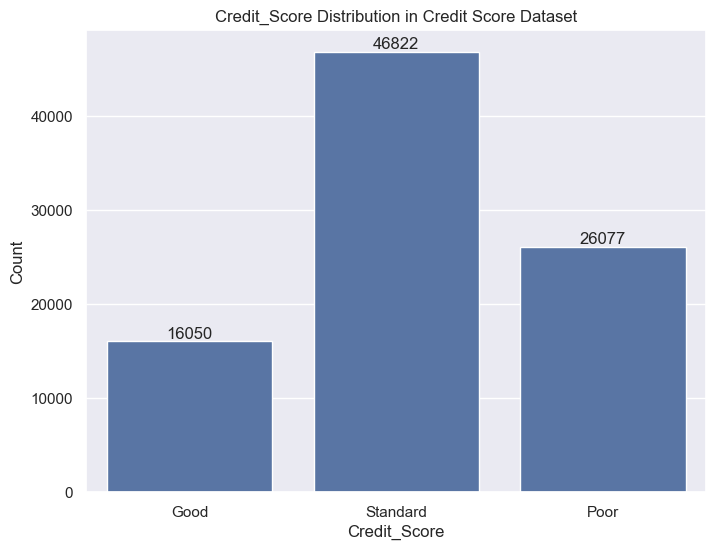

In [80]:
# Distribution of target variable

plt.figure(figsize=(8, 6))
ax=sns.countplot(data=df, x='Credit_Score')
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

- Credit_Score outputun degerlerinin dagilısı dengesiz.


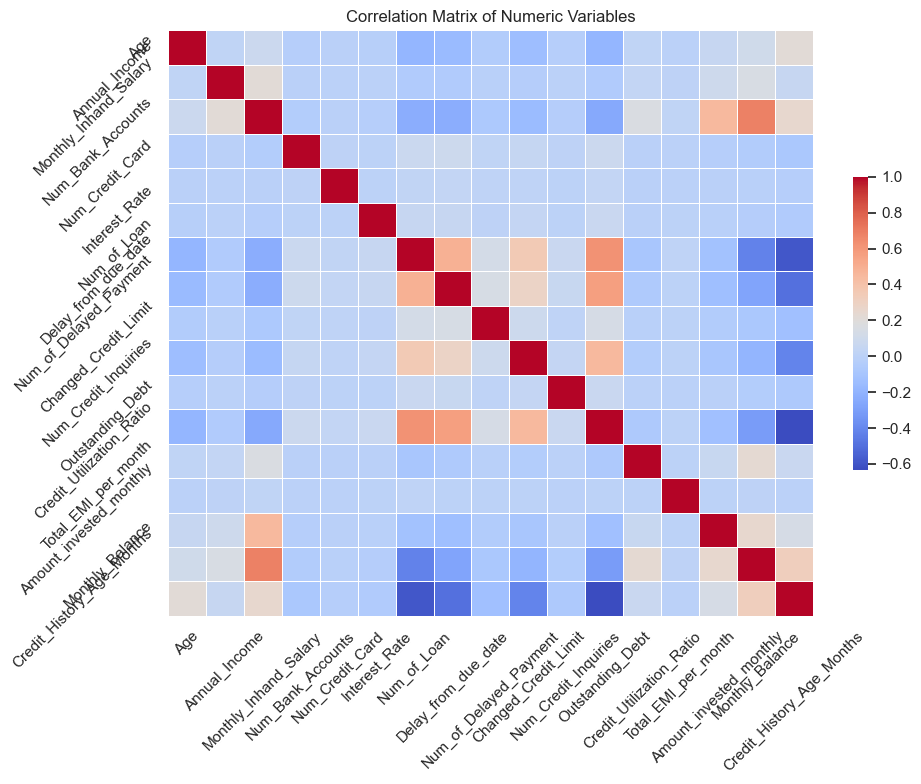

In [81]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

## Lưu dữ liệu đã được xử lý

In [82]:
df.to_csv("Processed_data.csv", index=False)